# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
from scipy import stats;
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean = 50, standard_deviation = 5 and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Variables
mu = 50;
sigma = 5;
sample_size = [10, 50, 500, 5000]

# Distributions & Tests
dists = [np.random.normal(mu, sigma, size) for size in sample_size]
tests = [stats.normaltest(dist) for dist in dists]

# Show tests
tests

C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


[NormaltestResult(statistic=2.42606586438647, pvalue=0.2972942374259847),
 NormaltestResult(statistic=0.7598579632189718, pvalue=0.6839099776735794),
 NormaltestResult(statistic=0.8095493309668085, pvalue=0.6671271206900904),
 NormaltestResult(statistic=0.03246894806388595, pvalue=0.9838965948052034)]

In [ ]:
# Para una alfa de 0.05, el único que cumple una distribución normal es el de tamaño muestral 5000, ya que 1-pvalue < 0.05.

#### Interpret the normaltest results and make your observations.

`Comments:`


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](images/ch-1.png)

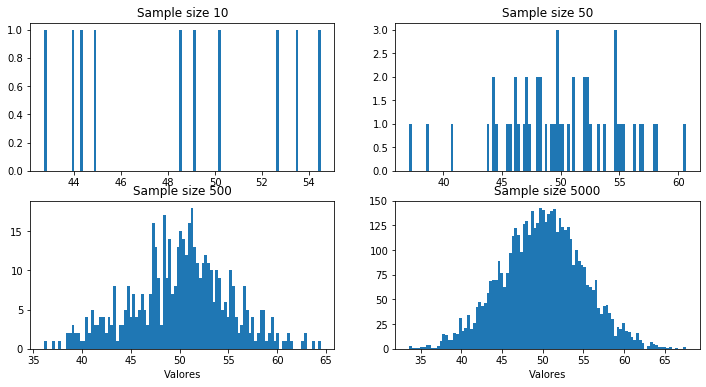

In [12]:
# Create figure and axes
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,6))

# Variables
# Plot each histogram

plt.sca(ax1)
plt.hist(dists[0], bins=100)
plt.title('Sample size 10')

plt.sca(ax2)
plt.hist(dists[1], bins=100)
plt.title('Sample size 50')

plt.sca(ax3)
plt.hist(dists[2], bins=100)
plt.xlabel('Valores')
plt.title('Sample size 500')

plt.sca(ax4)
plt.hist(dists[3], bins=100)
plt.xlabel('Valores')
plt.title('Sample size 5000')


plt.show()


#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

`Comments:`


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](images/ch-2.png)

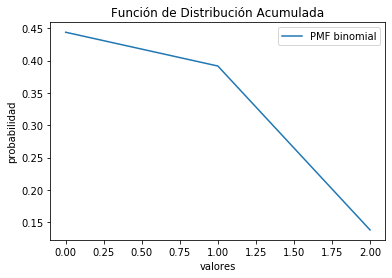

In [23]:
# Variables 

n, p = 5, 0.15 # parametros de forma 
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))

# Binomial distribution
fda_binom = stats.binom.pmf(x, n, p) # Probability Mass Function

# Plot line + bullet point -> Discrete Distribution Representation

plt.plot(x, fda_binom, '-', label='PMF binomial')
plt.title('Función de Distribución Acumulada')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc=1)
plt.show()



#### Explain what you observe from the plot above.

`Comments:`



#### Now plot PMP with 50, 500, and 5000 visitors.

In [5]:
# Create figure and axes


# Variables


# Plot each PMF
# For visualization reasons, the next discrete distributions are represented using continuous lines


#### What did you notice from the distribution plots? Comment your findings.

`Comments:`


# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

`Comments:`<br/>


#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [20]:
# Variables
mu = 300
visits = 320

# Probability
stats.poisson.pmf(visits, mu)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [21]:
# Variables
visits = 60

# Probability
stats.poisson.pmf(visits, mu)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](images/ch-3.png)

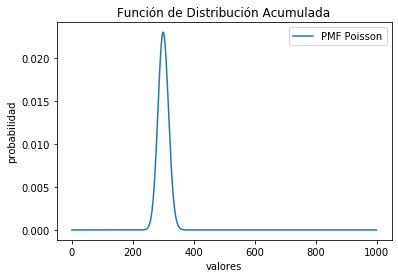

In [24]:
# Variables
visits = range(1000)

# Plot of the distribution
y = [stats.poisson.pmf(i, mu) for i in visits]

plt.plot(visits, y, '-', label='PMF Poisson')
plt.title('Función de Distribución Acumulada')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc=1)
plt.show()

# Challenge 4 - Central Limit Theorem
#### Example of application

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

#### a. What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [28]:
# Variables

mu = 35
sigma = 8
n = 200

# Probability

import scipy.stats as ss

X = ss.norm(35,8)

X.cdf(35) - X.cdf(30)

0.23401447095129946

#### b. What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [30]:
# Variables

mu = 35
sigma = 8
n = 200

# Probability

X = ss.norm(35*200/60, 8*200/60)
X.sf(125)

0.377330281529843

# Challenge 5 - Normal Variables 

The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40. 

<div align="center">$X → N(200,40)$</div>

#### 1. Find the probability that the monthly sales are more than 300. 

In [29]:
# Variables
mu = 200
sigma = 40

# Probability
X = ss.norm(35,8)

X.sf(300)

6.488677953802374e-241

#### 2. Find the probability that the monthly sales fall between 160 and 240.

In [31]:
# Probability
X.cdf(240) - X.cdf(160)

0.05207940642321396

#### 3. Find the probability that the monthly sales do not exceed 150.

In [33]:
# Probability

X.sf(150)

0.1056497736668553

#### 4. Find the probability that the monthly sales exceed 3000. 

In [34]:
# Probability
1 - X.cdf(3000)

0.0

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4. Find the following probabilities.
#### 1.The probability that in a particular month there is no violent robbery.

In [36]:
# Variables
mu = 4

# Probability
X = ss.poisson(4)

X.sf(0)

0.9816843611112658

#### 2. The probability that there are at least 1 in a given month. 

In [37]:
# Probability
X.cdf(1)

0.0915781944436709

#### 3. The probability that there are between 2 and 6 (inclusive) in a given month.

In [38]:
# Probability
X.cdf(6) - X.cdf(2)

0.6512227160438819

#### 4. The probability that there more than two in 15 days.  

In [39]:
# Probability (4 in a month)
X.cdf(4)

0.6288369351798734